In [49]:
pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install mysql-connector-python


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import mysql.connector
import os

csv_files = [
    ('Sample - Superstore_utf8.csv', 'Sample - Superstore_utf8'),  # Added payments.csv for specific handling
]

conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)
cursor = conn.cursor()

folder_path = '/Users/aryan/Desktop/Data Analytics'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)
    
    df = df.where(pd.notnull(df), None)
    
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    conn.commit()
conn.close()

Processing Sample - Superstore_utf8.csv
NaN values before replacement:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64



In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect (host ='127.0.0.1', user ='root', password ='9727267345', database ='Practice')

cur = db.cursor()


 ### 1) List all unique cities where customers are located.

In [55]:
query = """ SELECT DISTINCT State From sales_data.`sample - superstore_utf8` """

cur.execute(query)

data = cur.fetchall()
data

[('Kentucky',),
 ('California',),
 ('Florida',),
 ('North Carolina',),
 ('Washington',),
 ('Texas',),
 ('Wisconsin',),
 ('Utah',),
 ('Nebraska',),
 ('Pennsylvania',),
 ('Illinois',),
 ('Minnesota',),
 ('Michigan',),
 ('Delaware',),
 ('Indiana',),
 ('New York',),
 ('Arizona',),
 ('Virginia',),
 ('Tennessee',),
 ('Alabama',),
 ('South Carolina',),
 ('Oregon',),
 ('Colorado',),
 ('Iowa',),
 ('Ohio',),
 ('Missouri',),
 ('Oklahoma',),
 ('New Mexico',),
 ('Louisiana',),
 ('Connecticut',),
 ('New Jersey',),
 ('Massachusetts',),
 ('Georgia',),
 ('Nevada',),
 ('Rhode Island',),
 ('Mississippi',),
 ('Arkansas',),
 ('Montana',),
 ('New Hampshire',),
 ('Maryland',),
 ('District of Columbia',),
 ('Kansas',),
 ('Vermont',),
 ('Maine',),
 ('South Dakota',),
 ('Idaho',),
 ('North Dakota',),
 ('Wyoming',),
 ('West Virginia',)]

In [56]:
query = """ SELECT COUNT(DISTINCT State) AS unique_cities From sales_data.`sample - superstore_utf8` """ 

cur.execute(query)

data = cur.fetchall()
print(f"Number of unique American cities: {data[0]}")

Number of unique American cities: (49,)


# 2) Find the total sales per Sub-Category.

In [57]:
query = """
SELECT `Sub-Category`, SUM(Sales) AS total_sales
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Sub-Category`;
"""

cur.execute(query)
data = cur.fetchall()

import pandas as pd

df = pd.DataFrame(data, columns=["Sub-Category", "Total_Sales"])

df["Total_Sales"] = df["Total_Sales"].apply(lambda x: "{:,.2f}".format(x))

df


,Sub-Category,Total_Sales
0,Bookcases,"114,880.00"
1,Chairs,"328,449.10"
2,Labels,"12,486.31"
3,Tables,"206,965.53"
4,Storage,"216,803.21"
5,Furnishings,"82,752.23"
6,Art,"27,118.79"
7,Phones,"329,753.09"
8,Binders,"199,905.72"
9,Appliances,"107,532.16"


# 3) Count the number of customers from each state.

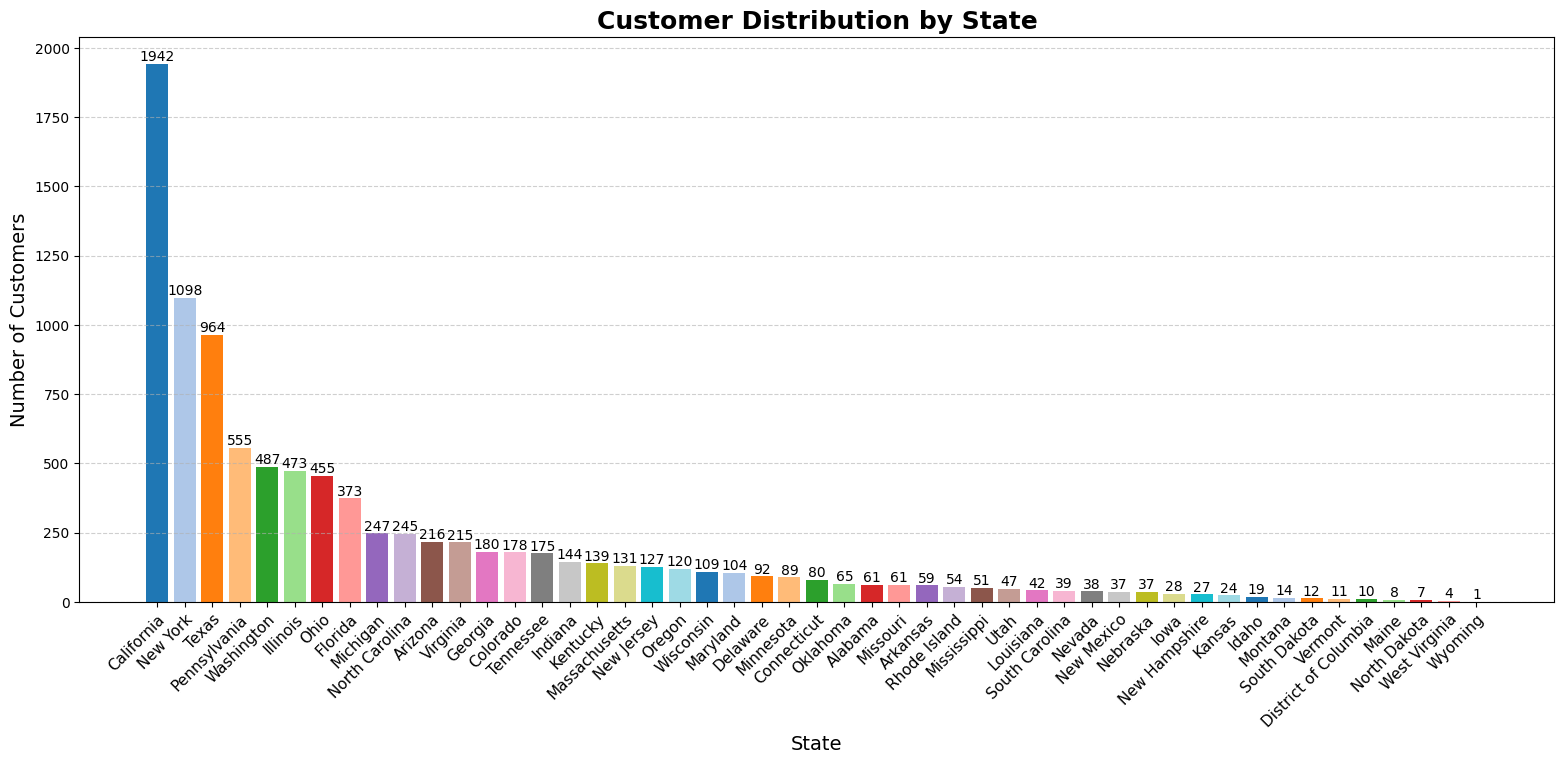

In [58]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect (host ='127.0.0.1', user ='root', password ='9727267345', database ='Practice')

cur = db.cursor()

query = """
SELECT State, COUNT(`Customer ID`) AS customer_count
FROM sales_data.`sample - superstore_utf8`
GROUP BY State;
"""
cur.execute (query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["State", "Customer_Count"])
df = df.sort_values(by="Customer_Count", ascending=False)

plt.figure(figsize=(16, 8))
bars = plt.bar(df["State"], df["Customer_Count"], color=plt.cm.tab20.colors)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height(), 
             f'{bar.get_height()}', 
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=11, rotation_mode='anchor')
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.title("Customer Distribution by State", fontsize=18, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout(pad=2)
plt.show()



# 4) Calculate the number of orders per month 
# (You can input data of any year between 2014 - 2017 )

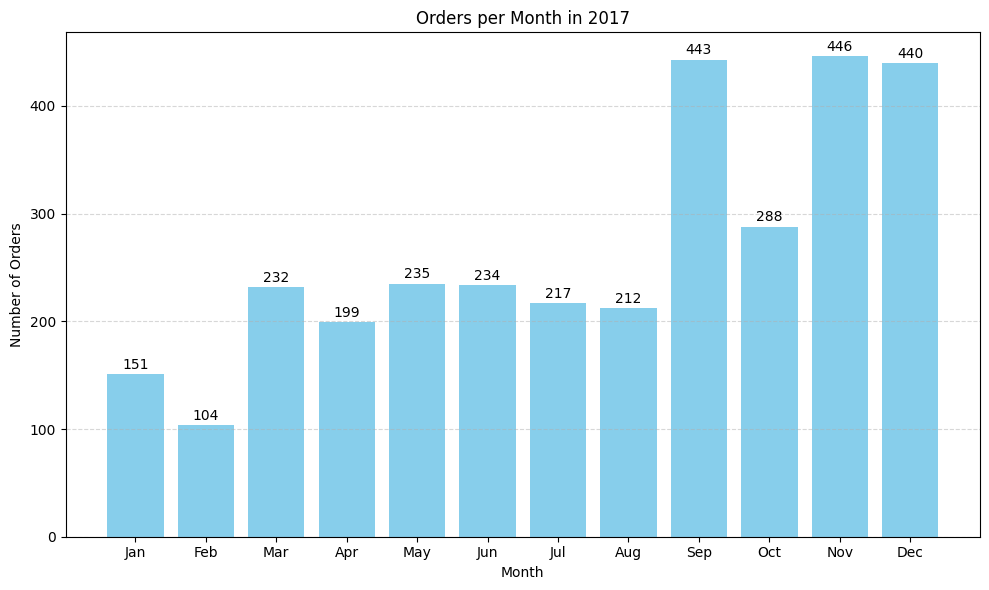

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """ 
SELECT 
    MONTH(STR_TO_DATE(`Order Date`, '%m/%d/%Y')) AS Order_Month,
    COUNT(`Order ID`) AS Order_Count
FROM sales_data.`sample - superstore_utf8`
WHERE YEAR(STR_TO_DATE(`Order Date`, '%m/%d/%Y')) = 2017
GROUP BY Order_Month
ORDER BY Order_Month ASC;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Month', 'Order_Count'])

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_Name'] = df['Month'].apply(lambda x: month_names[x-1])

plt.figure(figsize=(10,6))
bars = plt.bar(df['Month_Name'], df['Order_Count'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height),
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Orders per Month in 2017")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

cur.close()
db.close()


# 5) Find the average number of products per order, grouped by customer city.

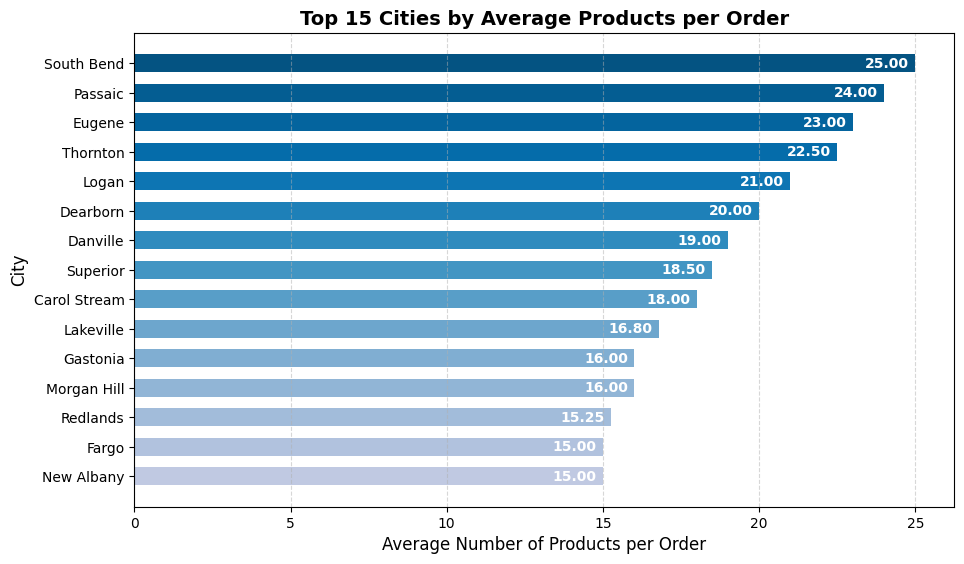

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import matplotlib.cm as cm
import numpy as np

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """
SELECT 
    `City`,
    AVG(Order_Product_Count) AS Avg_Products_Per_Order
FROM (
    SELECT 
        `Order ID`,
        `City`,
        SUM(`Quantity`) AS Order_Product_Count
    FROM sales_data.`sample - superstore_utf8`
    GROUP BY `Order ID`, `City`
) AS OrderCounts
GROUP BY `City`
ORDER BY Avg_Products_Per_Order DESC
LIMIT 15;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['City', 'Avg_Products_Per_Order'])
df = df.sort_values(by='Avg_Products_Per_Order', ascending=True)

plt.figure(figsize=(10, 6))
colors = cm.PuBu(np.linspace(0.3, 0.9, len(df)))
bars = plt.barh(df['City'], df['Avg_Products_Per_Order'], color=colors, height=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.2, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             va='center', ha='right', fontsize=10, color='white', fontweight='bold')

plt.xlabel("Average Number of Products per Order", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.title("Top 15 Cities by Average Products per Order", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout(pad=2)
plt.show()

cur.close()
db.close()


# 6) Calculate the percentage of total revenue contributed by each product category. (Detailed)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import matplotlib.cm as cm
import numpy as np

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """
SELECT 
	`Sub-Category`, 
    (SUM(`Sales`)/(Select SUM(`Sales`)
				   From sales_data.`sample - superstore_utf8`)) * 100 AS Sales_Percentage
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Sub-Category`
Order By Sales_Percentage Desc;

"""

cur.execute(query)
data = cur.fetchall()


df = pd.DataFrame(data, columns=["Sub-Category", "Sales_Percentage"])

df["Sales_Percentage"] = df["Sales_Percentage"].apply(lambda x: "{:,.2f}".format(x))

df


,Sub-Category,Sales_Percentage
0,Phones,14.51
1,Chairs,14.45
2,Storage,9.54
3,Tables,9.11
4,Binders,8.80
5,Machines,8.33
6,Accessories,7.37
7,Copiers,6.58
8,Bookcases,5.06
9,Appliances,4.73


# 7) Identify the correlation between product price and the number of times a product has been purchased.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """
SELECT 
    `Sub-Category`,
    ROUND(SUM(`Sales`) / SUM(`Quantity`), 2) AS `Average Product Price`,
    COUNT(`Quantity`) AS `Total Quantity`
FROM 
    sales_data.`sample - superstore_utf8`
GROUP BY 
    `Sub-Category`
ORDER BY 
    `Total Quantity` DESC;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Sub-Category", "Average Product Price", "Total Quantity"])

arr1 = df["Average Product Price"].astype(float)
arr2 = df["Total Quantity"].astype(float)

corr = np.corrcoef(arr1, arr2)[0,1]
print("the correlation between product price and the number of times a product has been purchased is ", corr)

df["Average Product Price"] = df["Average Product Price"].apply(lambda x: "{:,.2f}".format(x))
df["Total Quantity"] = df["Total Quantity"].apply(lambda x: "{:,.0f}".format(x))


the correlation between product price and the number of times a product has been purchased is  -0.47978271042217163


# 8) Calculate the moving average of order values for each customer over their order History.

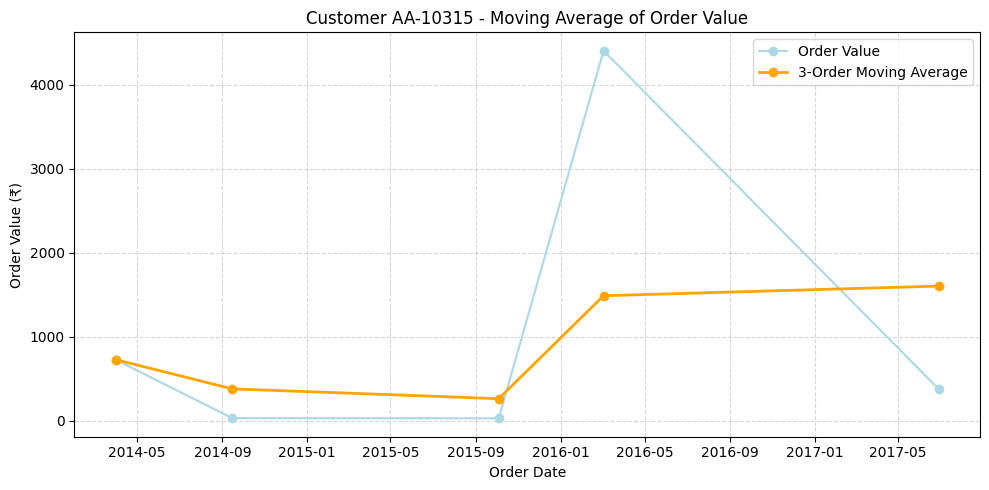

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """
SELECT 
    `Customer ID`,
    `Order ID`,
    STR_TO_DATE(`Order Date`, '%m/%d/%Y') AS Order_Date,
    SUM(`Sales`) AS Order_Value
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Customer ID`, `Order ID`, STR_TO_DATE(`Order Date`, '%m/%d/%Y')
ORDER BY `Customer ID`, Order_Date;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Customer_ID', 'Order_ID', 'Order_Date', 'Order_Value'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df = df.sort_values(by=['Customer_ID', 'Order_Date'])

df['Moving_Avg_Order_Value'] = df.groupby('Customer_ID')['Order_Value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

sample_customer = df['Customer_ID'].iloc[0]
sample_data = df[df['Customer_ID'] == sample_customer]

plt.figure(figsize=(10,5))
plt.plot(sample_data['Order_Date'], sample_data['Order_Value'], marker='o', label='Order Value', color='lightblue')
plt.plot(sample_data['Order_Date'], sample_data['Moving_Avg_Order_Value'], marker='o', label='3-Order Moving Average', color='orange', linewidth=2)
plt.title(f"Customer {sample_customer} - Moving Average of Order Value")
plt.xlabel("Order Date")
plt.ylabel("Order Value (₹)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

cur.close()
db.close()


# 09) Calculate the cumulative sales per month for year 2014,2015,2016 and 2017.

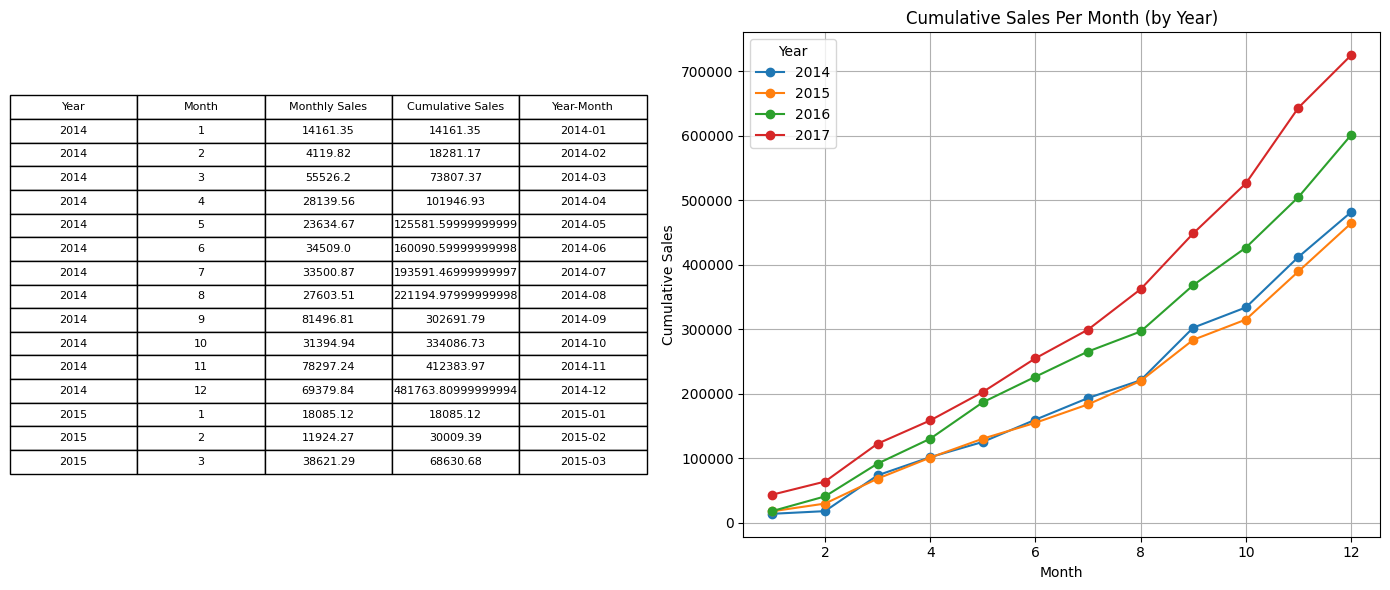

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import matplotlib.cm as cm
import numpy as np

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """ 
WITH CleanData AS (
    SELECT
        STR_TO_DATE(`Order Date`, '%m/%d/%Y') AS Clean_Order_Date,
        `Sales`
    FROM sales_data.`sample - superstore_utf8`
),

MonthlySales AS (
    SELECT
        YEAR(Clean_Order_Date) AS years,
        MONTH(Clean_Order_Date) AS months,
        ROUND(SUM(Sales), 2) AS monthly_sales
    FROM CleanData
    GROUP BY years, months
)

SELECT
    years,
    months,
    monthly_sales,
    SUM(monthly_sales) OVER (
        PARTITION BY years
        ORDER BY months
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS cumulative_sales
FROM MonthlySales
ORDER BY years, months;

"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=[
    "Year", 
    "Month", 
    "Monthly Sales", 
    "Cumulative Sales", 
])

df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.axis('off')  # Hide axis
table = plt.table(
    cellText=df.head(15).values,     # Show first 15 rows to keep it readable
    colLabels=df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.3)

plt.subplot(1, 2, 2)

for year in df["Year"].unique():
    yearly_data = df[df["Year"] == year]
    plt.plot(yearly_data["Month"], yearly_data["Cumulative Sales"], marker='o', label=str(year))

plt.title("Cumulative Sales Per Month (by Year)")
plt.xlabel("Month")
plt.ylabel("Cumulative Sales")
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()

plt.show()


# 10) Calculate the year-over-year growth rate of total sales

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import matplotlib.cm as cm
import numpy as np

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """ WITH CleanData AS (
    SELECT
        STR_TO_DATE(`Order Date`, '%m/%d/%Y') AS Clean_Order_Date,
        `Sales`
    FROM sales_data.`sample - superstore_utf8`
),

YearlySales AS (
    SELECT
        YEAR(Clean_Order_Date) AS year,
        ROUND(SUM(Sales), 2) AS total_sales
    FROM CleanData
    GROUP BY year
)

SELECT
    year,
    total_sales,
    ROUND(
        (total_sales - LAG(total_sales) OVER (ORDER BY year))
        / LAG(total_sales) OVER (ORDER BY year)
        * 100,
        2
    ) AS yoy_growth_percent
FROM YearlySales
ORDER BY year;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=[
   "Year", "Total Sales", "YBY Growth %"])
df

,Year,Total Sales,YBY Growth %
0,2014,481763.80,NaN
1,2015,464426.24,-3.60
2,2016,601265.26,29.46
3,2017,724994.56,20.58


# 11)  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [66]:

import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import matplotlib.cm as cm
import numpy as np

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """ WITH Clean AS (
    -- convert Order Date to real DATE; adjust format string if your data differs
    SELECT
        `Customer ID`           AS customer_id,
        `Order ID`              AS order_id,
        STR_TO_DATE(`Order Date`, '%m/%d/%Y') AS order_date
    FROM sales_data.`sample - superstore_utf8`
    -- optional: WHERE clause to limit to a particular cohort year or date range
),

FirstPurchase AS (
    -- first purchase date per customer
    SELECT
        customer_id,
        MIN(order_date) AS first_purchase_date
    FROM Clean
    GROUP BY customer_id
),

RetentionFlag AS (
    -- check if there exists any order for the same customer within 6 months AFTER first purchase
    SELECT
        f.customer_id,
        f.first_purchase_date,
        CASE
            WHEN EXISTS (
                SELECT 1
                FROM Clean c2
                WHERE c2.customer_id = f.customer_id
                  AND c2.order_date > f.first_purchase_date
                  AND c2.order_date <= DATE_ADD(f.first_purchase_date, INTERVAL 6 MONTH)
            ) THEN 1
            ELSE 0
        END AS retained_within_6m
    FROM FirstPurchase f
)

SELECT
    COUNT(*) AS total_customers,
    SUM(retained_within_6m) AS retained_customers,
    ROUND( (SUM(retained_within_6m) / COUNT(*)) * 100, 2) AS retention_rate_percent
FROM RetentionFlag;
"""

cur.execute (query)
data = cur.fetchall ()

data

[(793, Decimal('346'), Decimal('43.63'))]

# 12) Identify the top 3 customers who spent the most money in each year.

    Year Customer ID         Customer Name  Total Spent
0   2014    SM-20320           Sean Miller    23661.228
1   2014    SC-20095          Sanjit Chand    12876.480
2   2014    BM-11140          Becky Martin    10539.896
3   2015    PF-19120          Peter Fuller     8939.956
4   2015    KD-16495         Keith Dawkins     7039.044
5   2015    CM-12385  Christopher Martinez     6682.260
6   2016    TC-20980          Tamara Chand    18309.682
7   2016    CC-12370    Christopher Conant    11901.184
8   2016    AB-10105         Adrian Barton    10285.905
9   2017    RB-19360          Raymond Buch    14203.278
10  2017    TA-21385          Tom Ashbrook    13723.498
11  2017    HL-15040          Hunter Lopez    10522.550


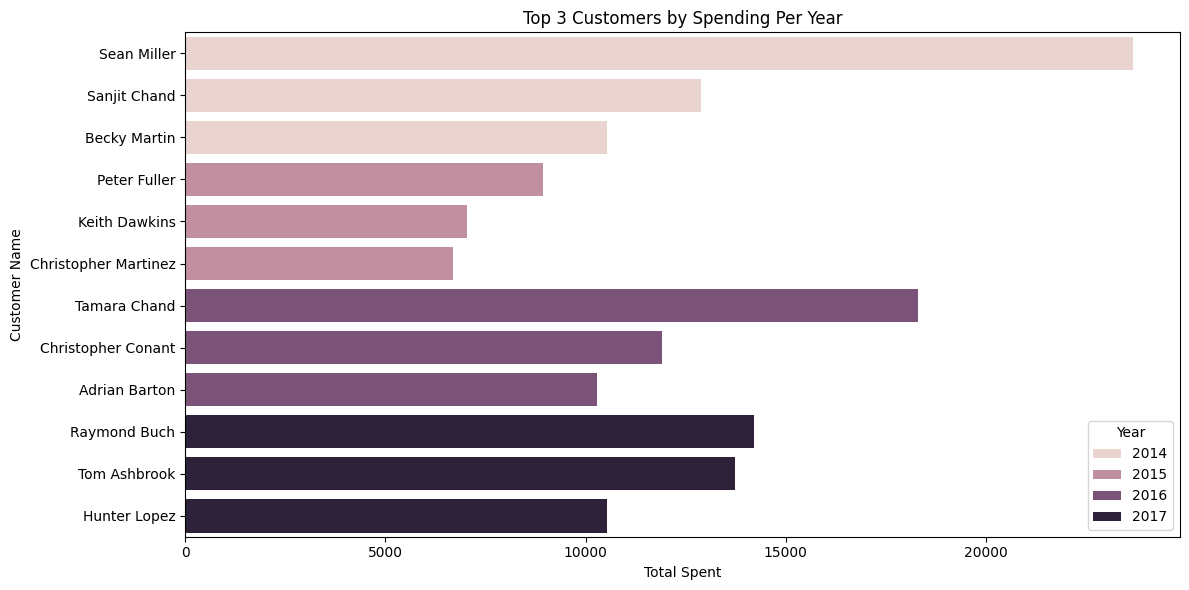

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

# Step 3: SQL Query
query = """
WITH CleanData AS (
    SELECT
        STR_TO_DATE(`Order Date`, '%m/%d/%Y') AS Clean_Order_Date,
        `Customer ID`,
        `Customer Name`,
        `Sales`
    FROM sales_data.`sample - superstore_utf8`
),

YearlyCustomerSpending AS (
    SELECT
        YEAR(Clean_Order_Date) AS order_year,
        `Customer ID`,
        `Customer Name`,
        SUM(`Sales`) AS total_spent
    FROM CleanData
    GROUP BY YEAR(Clean_Order_Date), `Customer ID`, `Customer Name`
),

RankedCustomers AS (
    SELECT
        order_year,
        `Customer ID`,
        `Customer Name`,
        total_spent,
        RANK() OVER (PARTITION BY order_year ORDER BY total_spent DESC) AS rank_no
    FROM YearlyCustomerSpending
)

SELECT
    order_year,
    `Customer ID`,
    `Customer Name`,
    total_spent
FROM RankedCustomers
WHERE rank_no <= 3
ORDER BY order_year, total_spent DESC;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Year", "Customer ID", "Customer Name", "Total Spent"])

print(df)  # (Optional) to verify data

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="Total Spent",
    y="Customer Name",
    hue="Year"
)
plt.title("Top 3 Customers by Spending Per Year")
plt.xlabel("Total Spent")
plt.ylabel("Customer Name")
plt.legend(title="Year")
plt.tight_layout()
plt.show()


# 13) Calculate the Average Delivery Time (Ship Date − Order Date) per Ship Mode 


🚚 Description of Ship Mode Classes:
Same Day       → Delivered the same day order is placed (fastest)
First Class    → Priority delivery, 1–3 days
Second Class   → Regular shipping, 3–5 days
Standard Class → Economical, slowest, ~5–7 days

📦 Average Delivery Time (in Hours) by Ship Mode:
        Ship Mode Avg_Delivery_Time_Hours
0        Same Day                    1.09
1     First Class                   52.35
2    Second Class                   77.68
3  Standard Class                  120.12


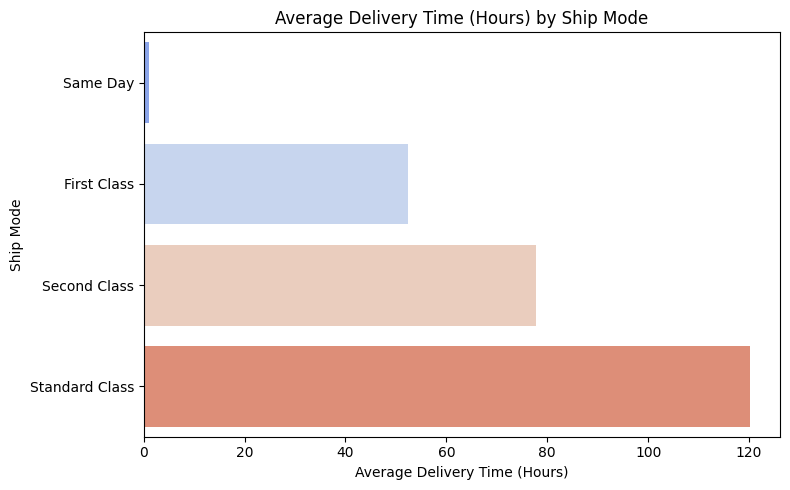

In [80]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',  
    database='Practice'
)

cur = db.cursor()

description = """
🚚 Description of Ship Mode Classes:
Same Day       → Delivered the same day order is placed (fastest)
First Class    → Priority delivery, 1–3 days
Second Class   → Regular shipping, 3–5 days
Standard Class → Economical, slowest, ~5–7 days
"""
print(description) 

query = """
SELECT 
    `Ship Mode`,
    ROUND(AVG(
        DATEDIFF(
            STR_TO_DATE(`Ship Date`, '%m/%d/%Y'),
            STR_TO_DATE(`Order Date`, '%m/%d/%Y')
        ) * 24
    ), 2) AS Avg_Delivery_Time_Hours
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Ship Mode`
ORDER BY Avg_Delivery_Time_Hours;
"""

cur.execute(query)

columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(cur.fetchall(), columns=columns)

cur.close()
db.close()

print("📦 Average Delivery Time (in Hours) by Ship Mode:")
print(df)

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Avg_Delivery_Time_Hours', y='Ship Mode', hue='Ship Mode', palette='coolwarm', legend=False)
plt.title('Average Delivery Time (Hours) by Ship Mode')
plt.xlabel('Average Delivery Time (Hours)')
plt.ylabel('Ship Mode')
plt.tight_layout()
plt.show()



# 14) Find the top 5 states with the highest profit margins, and check if discounts are higher in those states.

🏆 Top 5 States with Highest Profit Margins and Their Average Discounts:
                  State  Profit_Margin_Percent  Avg_Discount_Percent
0  District of Columbia                  36.98                  0.00
1              Delaware                  36.38                  0.65
2             Minnesota                  36.24                  0.00
3                 Maine                  35.77                  0.00
4               Indiana                  34.31                  0.00


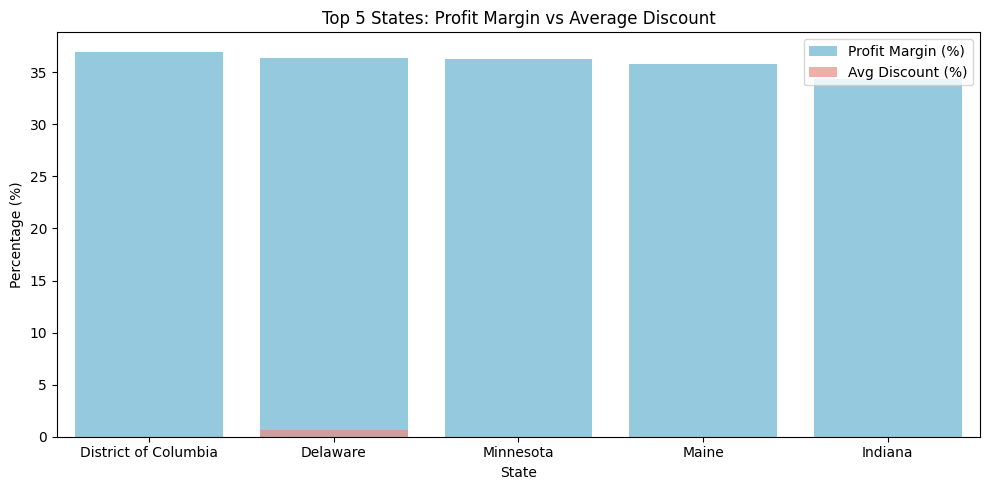

In [69]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Step 1: Connect to MySQL
db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',   # 🔒 (Tip: avoid hardcoding passwords in production)
    database='Practice'
)

# Step 2: Create cursor
cur = db.cursor()

# Step 3: SQL Query
# -----------------------------------------------------------------------------
# 🧮 Goal:
# Find the Top 5 States with the Highest Profit Margins.
# Profit Margin = (SUM(Profit) / SUM(Sales)) * 100
#
# Also, check whether discounts in those states are higher by comparing
# the average discount for each top-performing state.
# -----------------------------------------------------------------------------
query = """
SELECT 
    `State`,
    ROUND(SUM(`Profit`) / SUM(`Sales`) * 100, 2) AS Profit_Margin_Percent,
    ROUND(AVG(`Discount`) * 100, 2) AS Avg_Discount_Percent
FROM sales_data.`sample - superstore_utf8`
GROUP BY `State`
ORDER BY Profit_Margin_Percent DESC
LIMIT 5;
"""

# Step 4: Execute query
cur.execute(query)

# Step 5: Fetch results and convert to pandas DataFrame
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(cur.fetchall(), columns=columns)

# Step 6: Close connection
cur.close()
db.close()

# Step 7: Display DataFrame
print("🏆 Top 5 States with Highest Profit Margins and Their Average Discounts:")
print(df)

# Step 8: Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='State', y='Profit_Margin_Percent', color='skyblue', label='Profit Margin (%)')
sns.barplot(data=df, x='State', y='Avg_Discount_Percent', color='salmon', alpha=0.7, label='Avg Discount (%)')
plt.title('Top 5 States: Profit Margin vs Average Discount')
plt.ylabel('Percentage (%)')
plt.xlabel('State')
plt.legend()
plt.tight_layout()
plt.show()


# 15) Determine the profit-to-sales ratio for each sub-category

📊 Profit-to-Sales Ratio (%) by Sub-Category:



,Sub-Category,Profit_to_Sales_Ratio_Percent
0,Labels,44.42
1,Paper,43.41
2,Envelopes,42.12
3,Copiers,37.20
4,Fasteners,31.32
5,Accessories,25.05
6,Art,24.07
7,Appliances,16.87
8,Binders,15.00
9,Furnishings,14.00


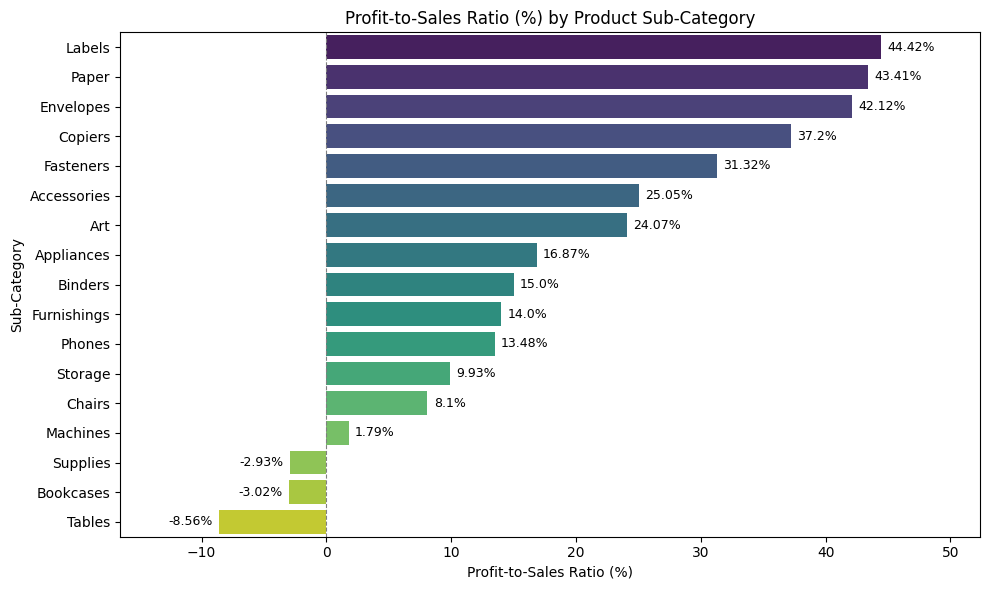

In [81]:
db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',  
    database='Practice'
)

cur = db.cursor()

query = """
SELECT 
    `Sub-Category`,
    ROUND(SUM(`Profit`) / SUM(`Sales`) * 100, 2) AS Profit_to_Sales_Ratio_Percent
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Sub-Category`
ORDER BY Profit_to_Sales_Ratio_Percent DESC;
"""

cur.execute(query)

columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(cur.fetchall(), columns=columns)

cur.close()
db.close()

print("📊 Profit-to-Sales Ratio (%) by Sub-Category:\n")
display(df)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    y='Sub-Category',
    x='Profit_to_Sales_Ratio_Percent',
    hue='Sub-Category',
    dodge=False,
    palette='viridis',
    legend=False
)

min_val = df['Profit_to_Sales_Ratio_Percent'].min()
max_val = df['Profit_to_Sales_Ratio_Percent'].max()
padding = (max_val - min_val) * 0.15
plt.xlim(min_val - padding, max_val + padding)

for i, v in enumerate(df['Profit_to_Sales_Ratio_Percent']):
    if v >= 0:
        plt.text(v + 0.5, i, f"{v}%", va='center', fontsize=9, color='black')
    else:
        plt.text(v - 0.5, i, f"{v}%", va='center', fontsize=9, color='black', ha='right')

plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # vertical zero line
plt.title('Profit-to-Sales Ratio (%) by Product Sub-Category')
plt.xlabel('Profit-to-Sales Ratio (%)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

# 16) Identify Top 5 Consistently Growing Customers whose total spend grew year over year.

📋 Customers with Consistent Year-over-Year Growth in Total Spend:



,Customer_ID,Customer_Name,Year,Total_Spend
0,AB-10015,Aaron Bergman,2014,322.22
1,AB-10015,Aaron Bergman,2016,563.94
2,AB-10600,Ann Blume,2014,14.48
3,AB-10600,Ann Blume,2015,26.33
4,AB-10600,Ann Blume,2017,1475.05
...,...,...,...,...
448,VP-21730,Victor Preis,2017,974.90
449,VT-21700,Valerie Takahito,2014,100.24
450,VT-21700,Valerie Takahito,2015,1636.36
451,YS-21880,Yana Sorensen,2015,1380.18


🏆 Top 5 Consistently Growing Customers by Total Spend:



,Customer_ID,Customer_Name,Total_Spend
3,RB-19360,Raymond Buch,15117.34
4,TS-21370,Todd Sumrall,11885.87
1,CJ-12010,Caroline Jumper,11079.74
2,KF-16285,Karen Ferguson,10604.26
0,BS-11365,Bill Shonely,10501.65


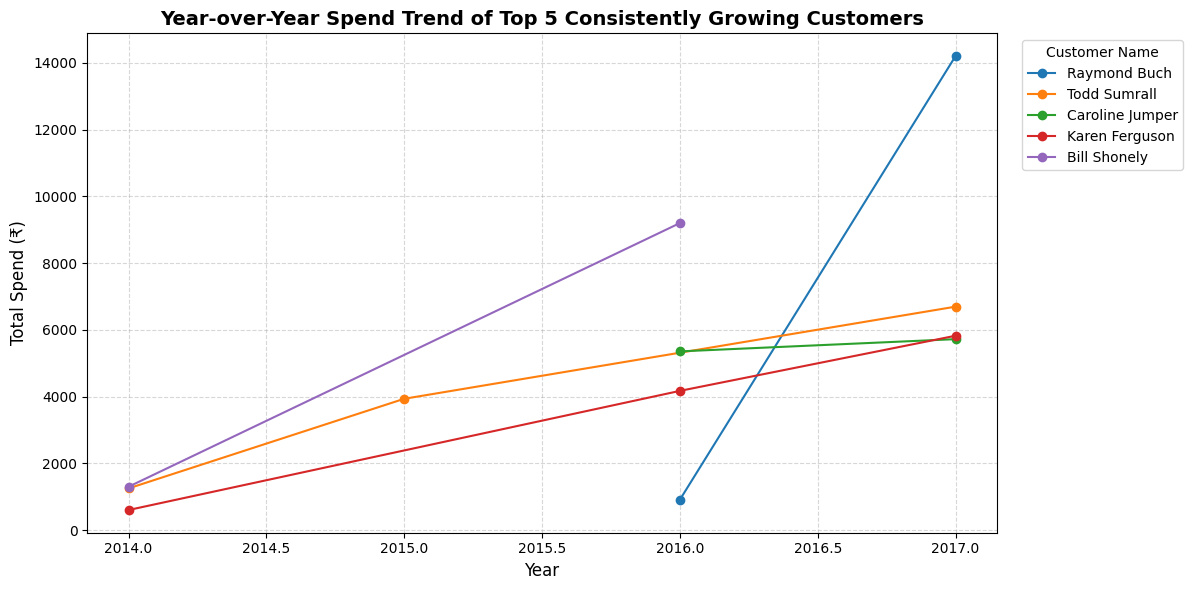

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)
cur = db.cursor()

query = """
SELECT 
    `Customer ID`,
    `Customer Name`,
    YEAR(STR_TO_DATE(`Order Date`, '%m/%d/%Y')) AS Order_Year,
    ROUND(SUM(`Sales`), 2) AS Total_Spend
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Customer ID`, `Customer Name`, YEAR(STR_TO_DATE(`Order Date`, '%m/%d/%Y'))
ORDER BY `Customer ID`, Order_Year;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Customer_ID', 'Customer_Name', 'Year', 'Total_Spend'])
df = df.sort_values(by=['Customer_ID', 'Year'])

def consistent_growth(group):
    return all(group['Total_Spend'].diff().fillna(1) > 0)

growing_customers = df.groupby('Customer_ID').filter(consistent_growth)
unique_customers = growing_customers['Customer_ID'].unique()

result = df[df['Customer_ID'].isin(unique_customers)].reset_index(drop=True)

print("📋 Customers with Consistent Year-over-Year Growth in Total Spend:\n")
display(result)

top_customers = result.groupby('Customer_ID')['Total_Spend'].sum().nlargest(5).index
top_data = result[result['Customer_ID'].isin(top_customers)]

top5_table = top_data.groupby(['Customer_ID', 'Customer_Name'])['Total_Spend'].sum().reset_index()
top5_table = top5_table.sort_values(by='Total_Spend', ascending=False)

print("🏆 Top 5 Consistently Growing Customers by Total Spend:\n")
display(top5_table)

plt.figure(figsize=(12, 6))
for customer in top_customers:
    customer_data = top_data[top_data['Customer_ID'] == customer]
    plt.plot(customer_data['Year'], customer_data['Total_Spend'], marker='o', label=customer_data['Customer_Name'].iloc[0])

plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Spend (₹)", fontsize=12)
plt.title("Year-over-Year Spend Trend of Top 5 Consistently Growing Customers", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Customer Name", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.show()

cur.close()
db.close()


# 17) Perform an RFM (Recency, Frequency, Monetary) segmentation of customers to classify them into loyalty tiers

📋 Customer Distribution by Loyalty Tier:



,Count,Percentage,Description
Loyalty_Tier,,,
Champions,23,2.90,"Top-tier customers (Frequent,high-spending)"
Loyal,192,24.21,"Regular, reliable customers"
Potential,195,24.59,Moderate engagement could become loyal
Needs Attention,191,24.09,"Declining engagement, may churn"
At Risk,192,24.21,"Low engagement, low spending, may churn"


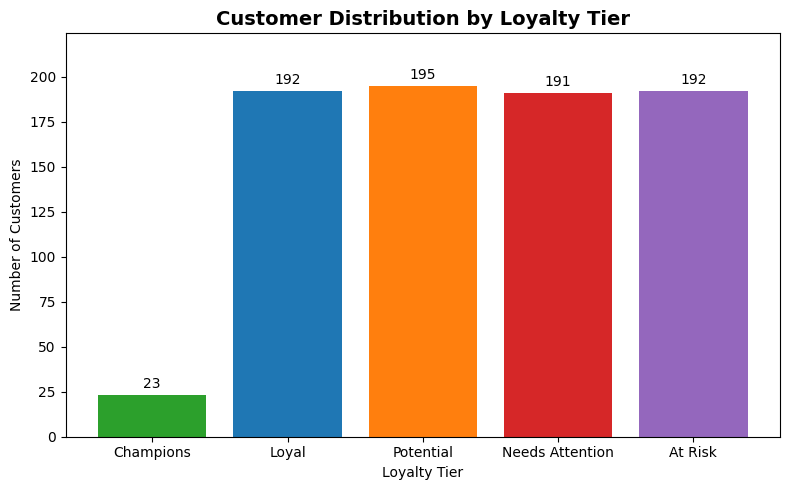

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import datetime as dt

db = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='9727267345',
    database='Practice'
)

cur = db.cursor()

query = """
SELECT 
    `Customer ID`,
    `Customer Name`,
    STR_TO_DATE(`Order Date`, '%m/%d/%Y') AS Order_Date,
    SUM(`Sales`) AS Order_Value
FROM sales_data.`sample - superstore_utf8`
GROUP BY `Customer ID`, `Customer Name`, `Order ID`, STR_TO_DATE(`Order Date`, '%m/%d/%Y')
ORDER BY `Customer ID`, Order_Date;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Customer_ID', 'Customer_Name', 'Order_Date', 'Order_Value'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

snapshot_date = df['Order_Date'].max() + pd.Timedelta(days=1)

rfm_table = df.groupby(['Customer_ID', 'Customer_Name']).agg({
    'Order_Date': lambda x: (snapshot_date - x.max()).days,
    'Order_Value': ['count', 'sum']
})

rfm_table.columns = ['Recency', 'Frequency', 'Monetary']
rfm_table = rfm_table.reset_index()

rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)

def rfm_tier(row):
    if row['RFM_Score'] >= '555':
        return 'Champions'
    elif row['RFM_Score'] >= '445':
        return 'Loyal'
    elif row['RFM_Score'] >= '333':
        return 'Potential'
    elif row['RFM_Score'] >= '222':
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm_table['Loyalty_Tier'] = rfm_table.apply(rfm_tier, axis=1)

tier_descriptions = {
    'Champions': 'Top-tier customers (Frequent,high-spending)',
    'Loyal': 'Regular, reliable customers',
    'Potential': 'Moderate engagement could become loyal',
    'Needs Attention': 'Declining engagement, may churn',
    'At Risk': 'Low engagement, low spending, may churn'
}

tier_counts = rfm_table['Loyalty_Tier'].value_counts().reindex(['Champions','Loyal','Potential','Needs Attention','At Risk'])
tier_percent = round((tier_counts / tier_counts.sum()) * 100, 2)
tier_summary = pd.DataFrame({
    'Count': tier_counts,
    'Percentage': tier_percent,
    'Description': [tier_descriptions[tier] for tier in tier_counts.index]
})

print("📋 Customer Distribution by Loyalty Tier:\n")
display(tier_summary)

plt.figure(figsize=(8,5))
bars = plt.bar(tier_counts.index, tier_counts.values, color=['#2ca02c','#1f77b4','#ff7f0e','#d62728','#9467bd'])

y_max = tier_counts.values.max() * 1.15
plt.ylim(0, y_max)

plt.title("Customer Distribution by Loyalty Tier", fontsize=14, fontweight='bold')
plt.ylabel("Number of Customers")
plt.xlabel("Loyalty Tier")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + y_max*0.01, str(height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

cur.close()
db.close()

